In [1]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from mpl_toolkits import mplot3d

In [3]:
sys.path.insert(0, '../')

## Setup detector with card

In [4]:
from detmodel import detector
from detmodel import plane
from detmodel import signal

In [16]:
my_detector = detector.Detector()
my_detector.read_card('../cards/atlas_nsw_pad_z0.yml')
#my_detector.read_card('../cards/atlas_mm_road.yml')

-- Initializing detector --
-- Reading card --


## Coverage angle

In [17]:
def get_coverage_angles(x):
    dz = my_detector.planes[-1].z - my_detector.planes[0].z
    dx = 0.5*my_detector.planes[-1].sizes['x']
    th_p = np.max( [np.arctan((dx-x)/dz), 0] )
    th_m = np.min( [-np.arctan((dx+x)/dz), 0] )
    return (th_m,th_p)

In [18]:
get_coverage_angles(24)

(-0.12783098927117978, 0.0)

## Pass muon

In [19]:
mux = 10
mua = get_coverage_angles(mux)[1]

my_detector.reset_planes()
my_detector.add_muon(
        mu_x=mux, 
        mu_y=-20, 
        mu_theta=mua, 
        mu_phi=0, 
        mu_time=0
    )

## Add noise

Noise rate in Hertz per strip is set in detector cards. First argument here is a multiplicative scale factor. Second argument is a random seed number.

In [20]:
my_detector.add_noise(1, randseed=34)

## Process signal

In [21]:
sigs = my_detector.get_signals(summary=True)

Total number of hits: 1
Total number of hits: 1
Total number of hits: 1
Total number of hits: 1
Total number of hits: 1
Total number of hits: 2
Total number of hits: 1
Total number of hits: 1
Total number of hits: 6
Total number of hits: 1
Total number of hits: 2
Total number of hits: 2
Total number of hits: 1
Total number of hits: 1
Total number of hits: 0
Total number of hits: 0


## Plot detector volume

In [22]:
from plotting import plotting

In [23]:
import importlib
importlib.reload(plotting)

<module 'plotting.plotting' from '/gpfs/slac/atlas/fs1/u/rafaeltl/Muon/21062022/si-mu-lator/notebooks/../plotting/plotting.py'>

In [24]:
%matplotlib widget

Found muon signal, plane  0  xseg  9  time  1.5945109234469168
Found muon signal, plane  1  xseg  10  time  5.284316829631641
Found muon signal, plane  2  xseg  9  time  -0.281987362825336
Found muon signal, plane  3  xseg  10  time  -8.265006100849005
Found muon signal, plane  4  xseg  79  time  -14.714320560264055
Found bkg signal, plane  5  xseg  69  time  -0.07993102967050447
Found bkg signal, plane  6  xseg  21  time  -43.51709778791169
Found muon signal, plane  7  xseg  103  time  32.4700751124034
Found bkg signal, plane  8  xseg  42  time  0.40394640656371905
Found muon signal, plane  8  xseg  114  time  -31.35317864767216
Found muon signal, plane  9  xseg  112  time  -4.786610179874836
Found bkg signal, plane  10  xseg  74  time  -34.909940602660015
Found muon signal, plane  11  xseg  92  time  25.635815222446325
Found muon signal, plane  12  xseg  13  time  3.3281552405202057
Found muon signal, plane  13  xseg  13  time  -1.728903587109215
[Point3D(1659962858449130/16656843226

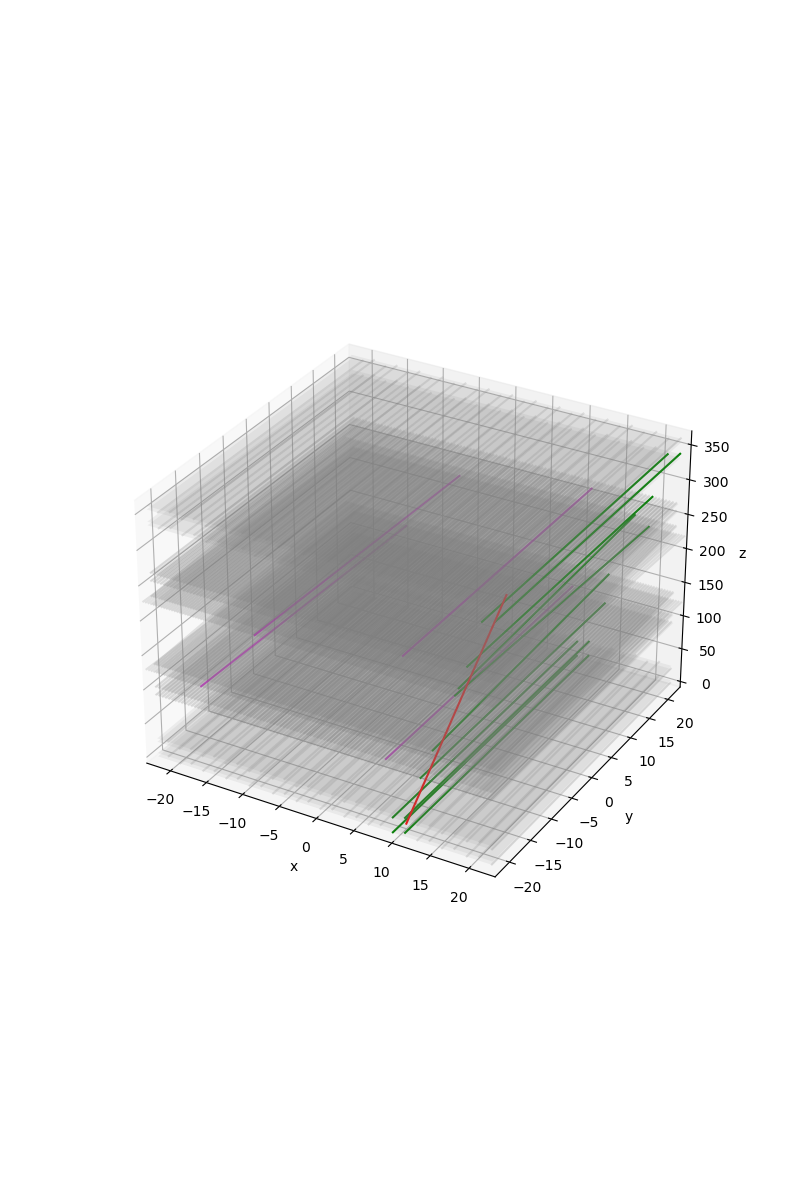

In [25]:
fig = plt.figure(figsize=(8,12))
ax = plt.axes(projection='3d')
plotting.plot_det_volume(my_detector, ax, draw_muon=1)

[Point3D(1608469681052330/166568432260433, -20, -10)] [Point3D(232587257617589/10000000000000, -20, 386)]


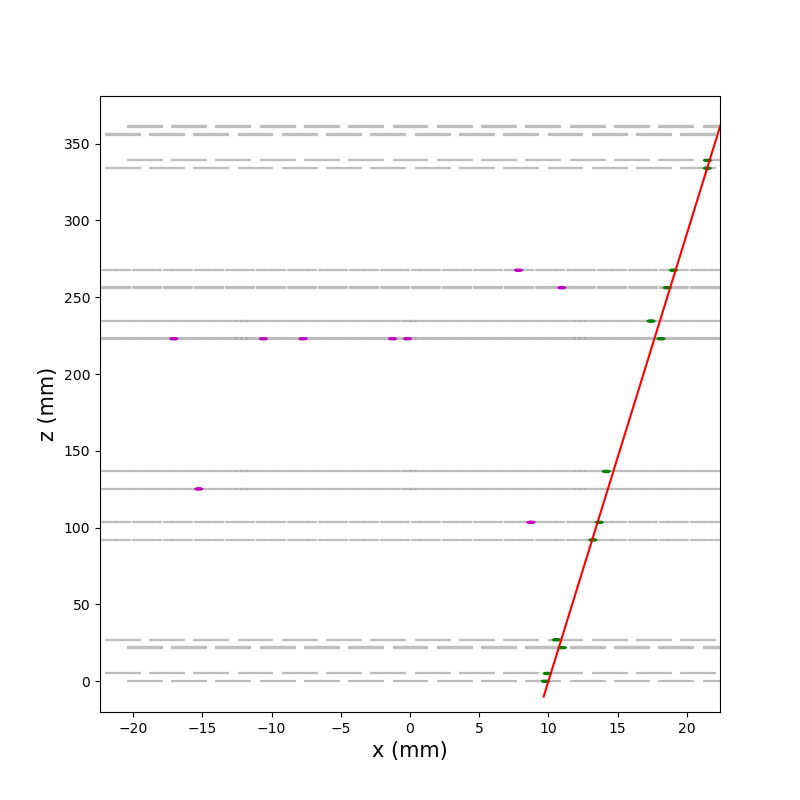

In [26]:
fig2 = plt.figure(figsize=(8,8))
ax2 = plt.axes()
plotting.plot_det_xz(my_detector, ax2, draw_muon=True, draw_allhits=True)
plt.show()